# TRAORE Modibo TP Random Forest

## J'importe les bibliothèques utiles

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

## Je fais l'analyse exploratoire des données

In [2]:
## Je charrge ma dataset à l'aide de pandas

dataset = pd.read_csv(r'Data\meteo.csv')
dataset.head()

,Unnamed: 0,Year,Month,Day,Hour,Minute,Temperature.daily.mean..2.m.above.gnd.,Relative.Humidity.daily.mean..2.m.above.gnd.,Mean.Sea.Level.Pressure.daily.mean..MSL.,Total.Precipitation.daily.sum..sfc.,...,Low.Cloud.Cover.daily.min..low.cld.lay.,Wind.Speed.daily.max..10.m.above.gnd.,Wind.Speed.daily.min..10.m.above.gnd.,Wind.Speed.daily.max..80.m.above.gnd.,Wind.Speed.daily.min..80.m.above.gnd.,Wind.Speed.daily.max..900.mb.,Wind.Speed.daily.min..900.mb.,Wind.Gust.daily.max..sfc.,Wind.Gust.daily.min..sfc.,pluie.demain
0,1,2010,6,1,0,0,13.45,77.88,1015.76,0.1,...,0,14.06,2.41,21.61,1.44,28.77,4.39,23.40,3.24,True
1,3,2010,6,3,0,0,14.27,83.58,1016.39,0.0,...,0,15.26,2.74,20.47,3.71,40.76,2.10,24.12,3.24,False
2,5,2010,6,5,0,0,19.88,66.58,1018.18,0.0,...,0,8.71,0.51,18.67,0.72,21.97,0.51,15.84,0.72,True
3,7,2010,6,7,0,0,19.31,72.00,1013.60,0.4,...,0,16.62,0.51,20.88,0.72,41.41,3.60,32.76,0.72,True
4,9,2010,6,9,0,0,22.06,74.29,1005.01,2.0,...,0,21.65,3.22,27.57,2.16,25.92,4.02,27.72,3.24,False


In [3]:
## Les dimenssions de la dataset : Nombre de lignes et de colonnes
dataset.shape

(1244, 47)

In [4]:
## Informations sur les colonnes et leur type
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1244 entries, 0 to 1243
Data columns (total 47 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   Unnamed: 0                                    1244 non-null   int64  
 1   Year                                          1244 non-null   int64  
 2   Month                                         1244 non-null   int64  
 3   Day                                           1244 non-null   int64  
 4   Hour                                          1244 non-null   int64  
 5   Minute                                        1244 non-null   int64  
 6   Temperature.daily.mean..2.m.above.gnd.        1244 non-null   float64
 7   Relative.Humidity.daily.mean..2.m.above.gnd.  1244 non-null   float64
 8   Mean.Sea.Level.Pressure.daily.mean..MSL.      1244 non-null   float64
 9   Total.Precipitation.daily.sum..sfc.           1244 non-null   f

In [5]:
dataset.isnull().sum()

Unnamed: 0                                      0
Year                                            0
Month                                           0
Day                                             0
Hour                                            0
Minute                                          0
Temperature.daily.mean..2.m.above.gnd.          0
Relative.Humidity.daily.mean..2.m.above.gnd.    0
Mean.Sea.Level.Pressure.daily.mean..MSL.        0
Total.Precipitation.daily.sum..sfc.             0
Snowfall.amount.raw.daily.sum..sfc.             0
Total.Cloud.Cover.daily.mean..sfc.              0
High.Cloud.Cover.daily.mean..high.cld.lay.      0
Medium.Cloud.Cover.daily.mean..mid.cld.lay.     0
Low.Cloud.Cover.daily.mean..low.cld.lay.        0
Sunshine.Duration.daily.sum..sfc.               0
Shortwave.Radiation.daily.sum..sfc.             0
Wind.Speed.daily.mean..10.m.above.gnd.          0
Wind.Direction.daily.mean..10.m.above.gnd.      0
Wind.Speed.daily.mean..80.m.above.gnd.          0


In [6]:
# Pour avoir yne information générale sur la dataset, on trouve que toutes les lignes sont bien remplies : pas de cellules vides
dataset.describe()

,Unnamed: 0,Year,Month,Day,Hour,Minute,Temperature.daily.mean..2.m.above.gnd.,Relative.Humidity.daily.mean..2.m.above.gnd.,Mean.Sea.Level.Pressure.daily.mean..MSL.,Total.Precipitation.daily.sum..sfc.,...,Low.Cloud.Cover.daily.max..low.cld.lay.,Low.Cloud.Cover.daily.min..low.cld.lay.,Wind.Speed.daily.max..10.m.above.gnd.,Wind.Speed.daily.min..10.m.above.gnd.,Wind.Speed.daily.max..80.m.above.gnd.,Wind.Speed.daily.min..80.m.above.gnd.,Wind.Speed.daily.max..900.mb.,Wind.Speed.daily.min..900.mb.,Wind.Gust.daily.max..sfc.,Wind.Gust.daily.min..sfc.
count,1244.00000,1244.000000,1244.000000,1244.000000,1244.0,1244.0,1244.000000,1244.000000,1244.000000,1244.000000,...,1244.000000,1244.000000,1244.000000,1244.000000,1244.000000,1244.000000,1244.000000,1244.000000,1244.000000,1244.000000
mean,1446.85209,2013.876206,6.492765,15.725080,0.0,0.0,12.226616,71.450595,1017.014510,2.213505,...,80.847267,4.550643,19.218690,3.681318,25.445466,4.901037,42.257982,11.371608,29.491640,6.655370
std,855.31687,2.380015,3.428025,8.791679,0.0,0.0,7.094412,9.419637,7.962332,4.301138,...,37.416907,18.747331,9.298039,4.235600,10.742637,6.157457,21.936074,12.358915,15.163162,7.486143
min,1.00000,2010.000000,1.000000,1.000000,0.0,0.0,-7.100000,41.120000,978.450000,0.000000,...,0.000000,0.000000,4.610000,0.000000,4.840000,0.000000,6.130000,0.000000,5.040000,0.000000
25%,700.50000,2012.000000,4.000000,8.000000,0.0,0.0,6.695000,65.110000,1012.645000,0.000000,...,100.000000,0.000000,12.310000,1.080000,18.190000,1.125000,25.180000,3.260000,19.080000,2.160000
50%,1438.00000,2014.000000,6.000000,16.000000,0.0,0.0,12.575000,71.880000,1016.965000,0.100000,...,100.000000,0.000000,17.330000,2.310000,23.815000,2.550000,37.935000,7.150000,25.920000,3.960000
75%,2183.50000,2016.000000,9.000000,23.000000,0.0,0.0,17.640000,78.420000,1021.647500,2.500000,...,100.000000,0.000000,23.875000,4.800000,29.917500,6.130000,55.505000,14.690000,36.360000,8.640000
max,2941.00000,2018.000000,12.000000,31.000000,0.0,0.0,29.590000,95.250000,1038.580000,40.300000,...,100.000000,100.000000,69.420000,36.040000,79.780000,46.130000,124.200000,82.070000,97.920000,51.120000


In [7]:
#Compter le nombre d'occuurence sur chaque colonne
dataset.nunique().sort_values()

Hour                                               1
Minute                                             1
pluie.demain                                       2
Year                                               9
Month                                             12
High.Cloud.Cover.daily.min..high.cld.lay.         25
Snowfall.amount.raw.daily.sum..sfc.               27
Day                                               31
Relative.Humidity.daily.max..2.m.above.gnd.       42
Low.Cloud.Cover.daily.min..low.cld.lay.           42
Medium.Cloud.Cover.daily.min..mid.cld.lay.        44
Low.Cloud.Cover.daily.max..low.cld.lay.           62
Relative.Humidity.daily.min..2.m.above.gnd.       68
Medium.Cloud.Cover.daily.max..mid.cld.lay.        86
Total.Cloud.Cover.daily.max..sfc.                 87
High.Cloud.Cover.daily.max..high.cld.lay.         93
Total.Cloud.Cover.daily.min..sfc.                 99
Wind.Gust.daily.min..sfc.                        100
Total.Precipitation.daily.sum..sfc.           

In [8]:
## dataset.corr()

<AxesSubplot:>

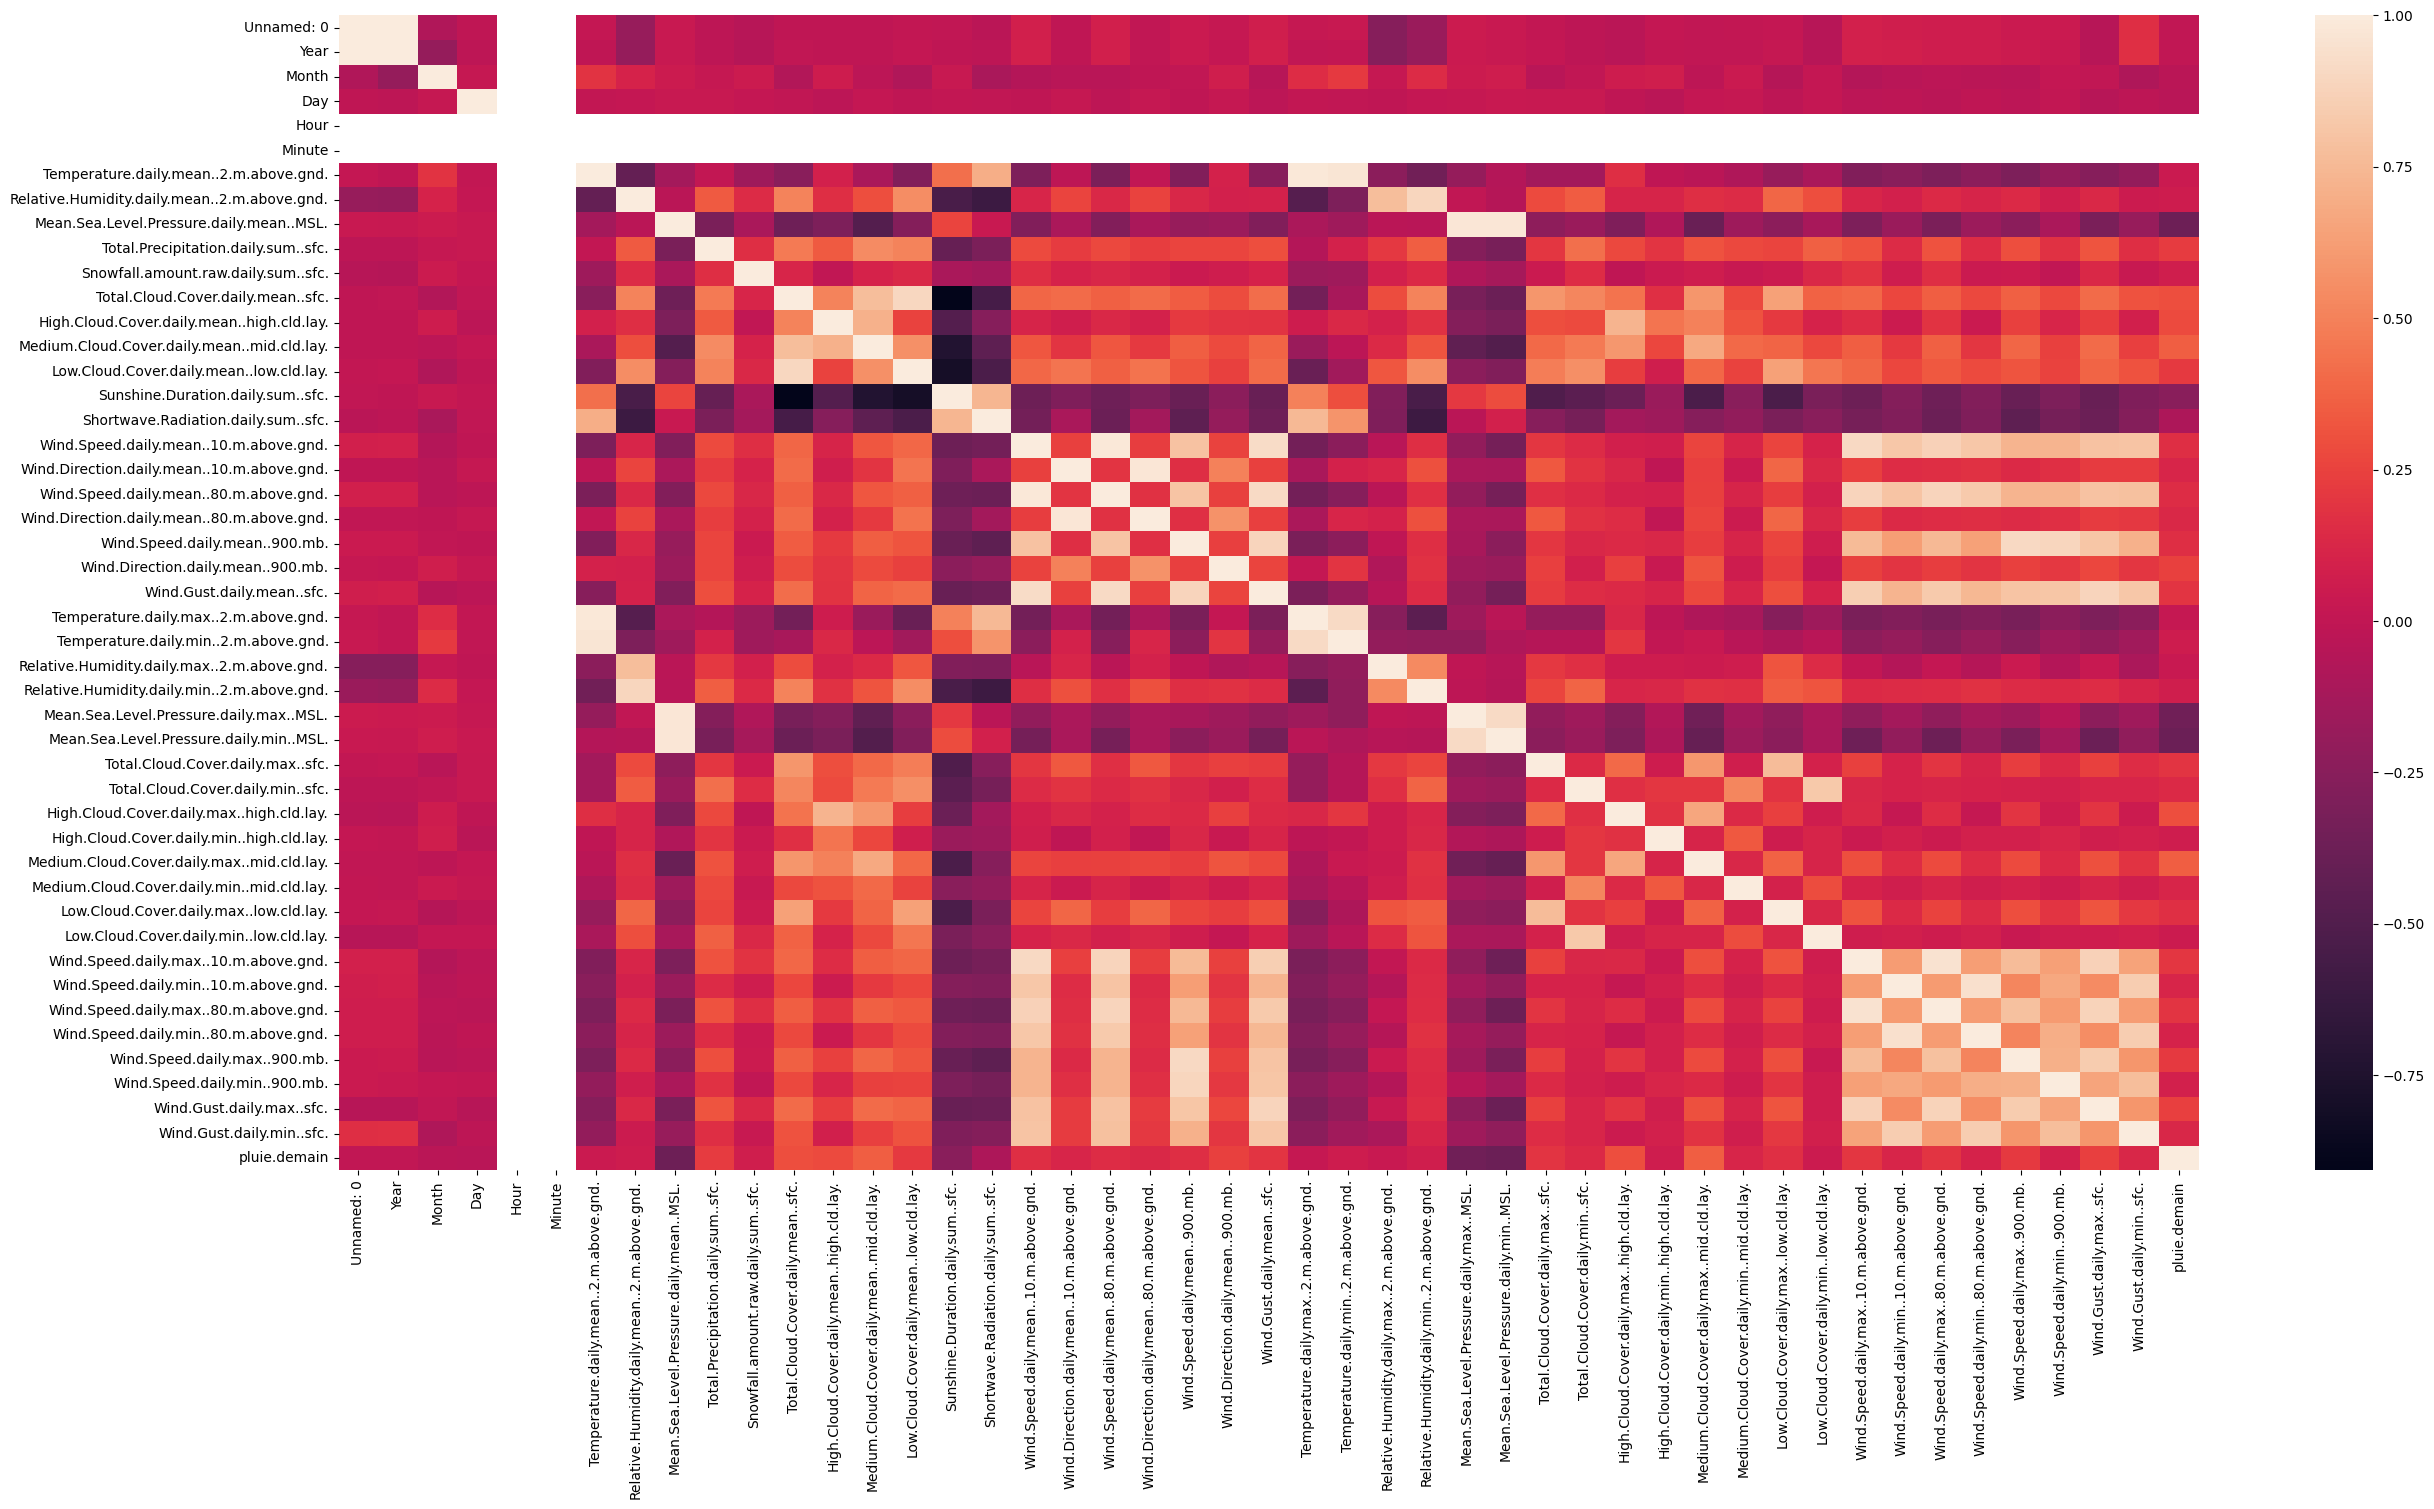

In [9]:
## Visualisation des correlations
plt.figure(figsize=(30, 15))
sns.heatmap(dataset.corr())

In [10]:
# Pour voir les relation entre chaque colonne en termes de visualisation.
#sns.pairplot(dataset)

In [11]:
## Selection des colonnes pour l'entraînement du modèle en se basant sur les correlations
New_dataset = dataset[['Total.Precipitation.daily.sum..sfc.',
                 'Total.Cloud.Cover.daily.mean..sfc.', 
                 'High.Cloud.Cover.daily.mean..high.cld.lay.',
                 'Medium.Cloud.Cover.daily.mean..mid.cld.lay.',
                 'Low.Cloud.Cover.daily.mean..low.cld.lay.',
                 'Wind.Direction.daily.mean..900.mb.',
                 'Total.Cloud.Cover.daily.max..sfc.',
                 'High.Cloud.Cover.daily.max..high.cld.lay.',
                 'Medium.Cloud.Cover.daily.max..mid.cld.lay.',
                 'Low.Cloud.Cover.daily.max..low.cld.lay.',
                 'Wind.Speed.daily.max..10.m.above.gnd.',
                 'Wind.Speed.daily.max..80.m.above.gnd.',
                 'Wind.Speed.daily.max..900.mb.',
                 'Wind.Gust.daily.max..sfc.',
                 'pluie.demain' 
                ]]

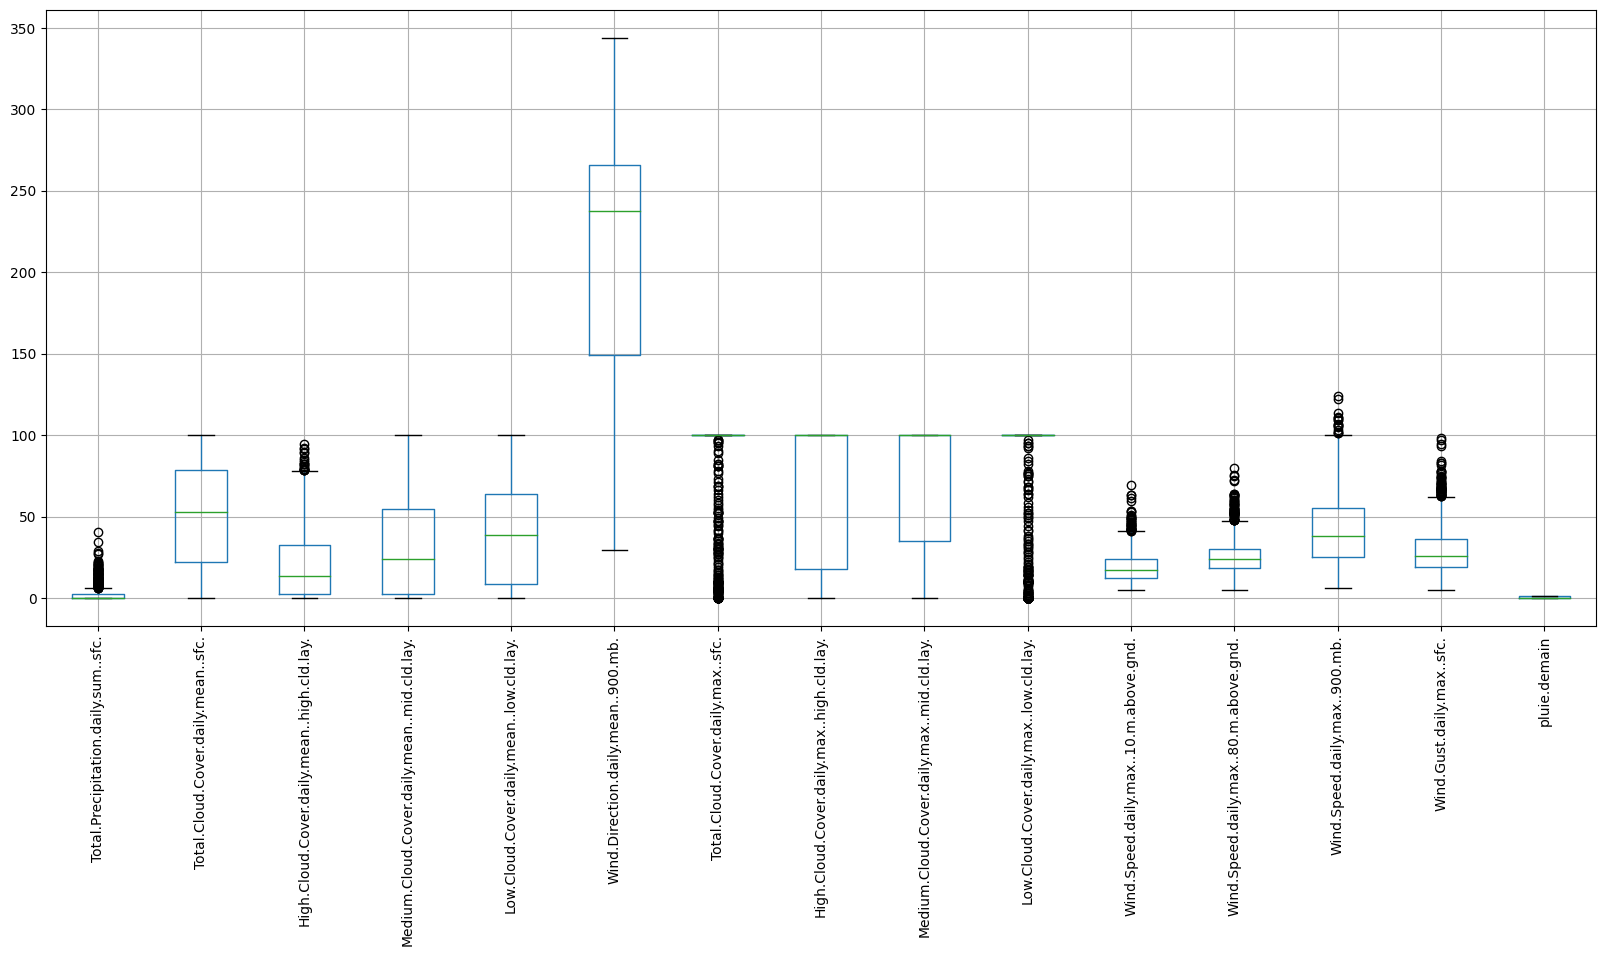

In [12]:
plt.figure(figsize=(20, 8))
New_dataset.boxplot()
plt.xticks(rotation='vertical')
plt.show()

In [13]:
## J'affiche les 5 premières lignes de ma dataset
New_dataset.head()

,Total.Precipitation.daily.sum..sfc.,Total.Cloud.Cover.daily.mean..sfc.,High.Cloud.Cover.daily.mean..high.cld.lay.,Medium.Cloud.Cover.daily.mean..mid.cld.lay.,Low.Cloud.Cover.daily.mean..low.cld.lay.,Wind.Direction.daily.mean..900.mb.,Total.Cloud.Cover.daily.max..sfc.,High.Cloud.Cover.daily.max..high.cld.lay.,Medium.Cloud.Cover.daily.max..mid.cld.lay.,Low.Cloud.Cover.daily.max..low.cld.lay.,Wind.Speed.daily.max..10.m.above.gnd.,Wind.Speed.daily.max..80.m.above.gnd.,Wind.Speed.daily.max..900.mb.,Wind.Gust.daily.max..sfc.,pluie.demain
0,0.1,65.04,33.12,36.88,45.08,318.28,100.0,100,100,100,14.06,21.61,28.77,23.40,True
1,0.0,80.95,31.62,10.83,80.54,75.29,100.0,100,100,100,15.26,20.47,40.76,24.12,False
2,0.0,0.00,0.00,0.00,0.00,167.13,0.0,0,0,0,8.71,18.67,21.97,15.84,True
3,0.4,49.69,24.12,24.33,49.25,276.32,100.0,100,100,100,16.62,20.88,41.41,32.76,True
4,2.0,58.77,48.42,54.67,22.17,207.83,100.0,100,100,100,21.65,27.57,25.92,27.72,False


In [14]:
# On voit que la colonne 'pluie.demain' est un booléen qui prend la valeur True ou False je la convertis en données
# numériques Pour pouvoir faire du machine learning True = 1 et False = 0

New_dataset['pluie.demain'].replace([False, True],[0, 1],inplace = True)
New_dataset.head()

C:\Users\21265\AppData\Local\Temp\ipykernel_19860\2623716245.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  New_dataset['pluie.demain'].replace([False, True],[0, 1],inplace = True)


,Total.Precipitation.daily.sum..sfc.,Total.Cloud.Cover.daily.mean..sfc.,High.Cloud.Cover.daily.mean..high.cld.lay.,Medium.Cloud.Cover.daily.mean..mid.cld.lay.,Low.Cloud.Cover.daily.mean..low.cld.lay.,Wind.Direction.daily.mean..900.mb.,Total.Cloud.Cover.daily.max..sfc.,High.Cloud.Cover.daily.max..high.cld.lay.,Medium.Cloud.Cover.daily.max..mid.cld.lay.,Low.Cloud.Cover.daily.max..low.cld.lay.,Wind.Speed.daily.max..10.m.above.gnd.,Wind.Speed.daily.max..80.m.above.gnd.,Wind.Speed.daily.max..900.mb.,Wind.Gust.daily.max..sfc.,pluie.demain
0,0.1,65.04,33.12,36.88,45.08,318.28,100.0,100,100,100,14.06,21.61,28.77,23.40,1
1,0.0,80.95,31.62,10.83,80.54,75.29,100.0,100,100,100,15.26,20.47,40.76,24.12,0
2,0.0,0.00,0.00,0.00,0.00,167.13,0.0,0,0,0,8.71,18.67,21.97,15.84,1
3,0.4,49.69,24.12,24.33,49.25,276.32,100.0,100,100,100,16.62,20.88,41.41,32.76,1
4,2.0,58.77,48.42,54.67,22.17,207.83,100.0,100,100,100,21.65,27.57,25.92,27.72,0


## Entraînement du modèle

In [15]:
## Les features pour l'entraînement et le test sont toutes les colonnes de la novelle dataset sauf la colonne 'pluie.demain'

X_dataset = New_dataset.drop('pluie.demain', axis = 1)

In [16]:
## La target ici c'est la colonne 'pluie.demain' qu'on cherche à prédire sachant X

y_dataset = New_dataset['pluie.demain']

In [17]:
print("La taille de X_dataset est : {}.\nLa taille de y_dataset est {}".format(X_dataset.shape, y_dataset.shape))

La taille de X_dataset est : (1244, 14).
La taille de y_dataset est (1244,)


In [18]:
## Repartition des données en Train Set et Test Set
X_train, X_test, y_train, y_test = train_test_split(X_dataset, y_dataset, test_size = 0.3, random_state = 101)

In [19]:
print('Taille de X_train : {}'.format(X_train.shape))
print('Taille de y_train : {}'.format(y_train.shape))
print('Taille de X_test : {}'.format(X_test.shape))
print('Taille de y_test : {}'.format(y_test.shape))

Taille de X_train : (870, 14)
Taille de y_train : (870,)
Taille de X_test : (374, 14)
Taille de y_test : (374,)


In [20]:
## Création du model Random Forest
model = RandomForestClassifier(n_estimators=100, random_state = 42)
model

RandomForestClassifier(random_state=42)

In [21]:
## Injection des données dans le modèle

model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [22]:
## Predire sur le test set pour évaluer la performance du modèle
predictions_train = model.predict(X_train)
predictions_test = model.predict(X_test)

In [23]:
accuracy_train = accuracy_score(y_train, predictions_train )
accuracy_test = accuracy_score(y_test, predictions_test)

In [24]:
print("Accuracy du modèle sur le Train Set : {:.2f}".format(accuracy_train))
print("Accuracy du modèle sur le Test Set : {:.2f}".format(accuracy_test))

Accuracy du modèle sur le Train Set : 1.00
Accuracy du modèle sur le Test Set : 0.71


In [25]:
## Matrice de confusion
matrice_de_confusion = confusion_matrix(y_test, predictions_test)
print(matrice_de_confusion)

[[123  54]
 [ 55 142]]


## Optimisation des paramètres avec la validation croisée

In [26]:
n_estimators = [int(x) for x in np.linspace(start = 10, stop = 80, num = 10)]
max_features = ['auto', 'sqrt']
max_depth = [2,4]
min_samples_split= [2,5]
min_samples_leaf= [1,2]
bootstrap = [True, False]

In [27]:
param_gird ={'n_estimators': n_estimators,
            'max_features': max_features,
             'max_depth': max_depth,
             'min_samples_split': min_samples_split,
             'min_samples_leaf': min_samples_leaf,
             'bootstrap' : bootstrap            
            }
print(param_gird)

{'n_estimators': [10, 17, 25, 33, 41, 48, 56, 64, 72, 80], 'max_features': ['auto', 'sqrt'], 'max_depth': [2, 4], 'min_samples_split': [2, 5], 'min_samples_leaf': [1, 2], 'bootstrap': [True, False]}


In [28]:
model_2 = RandomForestClassifier()

In [29]:
model_Grid = GridSearchCV(estimator= model_2, param_grid = param_gird, cv = 3, verbose = 2, n_jobs = 3)

In [30]:
model_Grid.fit(X_train, y_train)

Fitting 3 folds for each of 320 candidates, totalling 960 fits


GridSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=3,
             param_grid={'bootstrap': [True, False], 'max_depth': [2, 4],
                         'max_features': ['auto', 'sqrt'],
                         'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 5],
                         'n_estimators': [10, 17, 25, 33, 41, 48, 56, 64, 72,
                                          80]},
             verbose=2)

In [31]:
model_Grid.best_params_

{'bootstrap': True,
 'max_depth': 4,
 'max_features': 'sqrt',
 'min_samples_leaf': 2,
 'min_samples_split': 2,
 'n_estimators': 56}

In [32]:
print('Train Accuracy : {:.2f}'.format(model_Grid.score(X_train, y_train)))
print('Test Accuracy : {:.2f}'.format(model_Grid.score(X_test, y_test)))

Train Accuracy : 0.75
Test Accuracy : 0.71
